 ## Proyecto 04 - Series de Tiempo


## GITHUB 

## Consigna
Te presentamos los pasos a seguir para realizar el proyecto 04.

Elige tu punto de partida entre dos opciones:
* Tus Proyectos 01 y 02
* Tu Proyecto 03
Si corresponde, emprolija lo hecho hasta el momento, incorporando las correcciones y/o sugerencias que hayas recibido de tu(s) evaluador/a (es/as).

Formula una nueva pregunta, problema o desafío para explorar. Aquí hay una lista no exhaustiva de opciones que puedes elegir:

* Prueba un modelo de Machine Learning nuevo que no hayas visto en la carrera. 
* En ese caso, debes explicar su funcionamiento y por qué consideras apropiado aplicarlo. 
* La ganancia no necesariamente tiene que ser en desempeño, también puede ser en interpretabilidad o aplicabilidad.
* Agrega al proyecto información de otra fuente. ¡Es sumamente válido! En ese caso, debe estar claramente explicado cómo conseguiste esos datos y qué usos esperas darles.
* Los datos deben ser accesibles por tu evaluador/a (por ejemplo, puedes subirlos al repositorio). Presta atención a la sensibilidad y privacidad de los datos antes de compartirlos.
* Continúa el Análisis Exploratorio de Datos. Recuerda que es tan importante como entrenar un modelo de Machine Learning.
* Sigue las sugerencias que te propusimos en los notebooks para continuar el Proyecto 03.
* Plantea un objetivo alcanzable. En esta etapa de tu formación, es preferible un problema sencillo bien abordado que uno ambicioso que no sabes cómo abordar. 
* El objetivo debe estar correctamente explicitado. Debes explicar qué quieres hacer y qué esperas encontrar. Imagina que es una tarea en tu trabajo y tienes que explicarle a un/a jefe/a qué vas a hacer y por qué.

## Checklist de evaluación

* Se evaluará la claridad con la que está expuesto el objetivo a alcanzar y su relevancia.
* Los pasos deben estar correctamente justificados. No deben haber grandes grupos de celdas de código sin explicar su función. Lo mismo aplica para los gráficos. Recuerda que el notebook es un informe.
Las preguntas que se respondan deben estar correctamente explicitadas.
* Imagina que este proyecto lo usarías para presentar en una entrevista de trabajo, o que lo debes presentar en tu trabajo. Presta mucha atención a la redacción, presentación de gráficos, etc.
* Debes entregar el proyecto anterior correspondiente (Proyecto 2 si eliges continuar con el dataset de Properati, Proyecto 3 si eliges continuar con alguna aplicación), el cual debe estar subido al repositorio.
* Incorpora las correcciones y/o sugerencias que tu evaluador/a te haya dado en la devolución del proyecto correspondiente anterior.
* Antes de subir tu proyecto a la plataforma Acámica para que sea evaluado, verifica que el Notebook se ejecute sin errores.

## Librerias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import datetime as dt
from sklearn.preprocessing import OneHotEncoder,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error


* Se carga el dataset.

In [2]:
data_2020 = pd.read_csv(r'flujo-vehicular-2020.csv', sep =',')
data_2020.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


* Se hace una mascara que cumpla la condicion estacion Illia y la forma de pago Efectivo.
* Se quitan las columnas que no se van a utilizar.

In [3]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask_2020 = np.logical_and(data_2020.estacion=='ILLIA', data_2020.forma_pago == 'Efectivo')
data_2020 = data_2020[mask_2020]
#Quitamos las columnas que no vamos a utilizar
data_2020.drop(columns = ['periodo','hora_inicio','hora_fin','mes','dia','forma_pago','dia_fecha','observacion','estacion'], inplace = True)
data_2020.head()

,fecha,tipo_vehiculo,sentido,cantidad_pasos
52,2020-01-01 00:00:00,Auto,Centro,326.0
53,2020-01-01 00:00:00,Auto,Provincia,319.0
134,2020-01-01 00:00:00,Auto,Centro,199.0
135,2020-01-01 00:00:00,Auto,Provincia,180.0
202,2020-01-01 00:00:00,Auto,Centro,114.0


In [4]:
#Se transforma la fecha y le quita la hora.
data_2020["fecha"] = pd.to_datetime(data_2020["fecha"])

In [5]:
#Se imprime en nuevo dataset.
data_2020

,fecha,tipo_vehiculo,sentido,cantidad_pasos
52,2020-01-01,Auto,Centro,326.0
53,2020-01-01,Auto,Provincia,319.0
134,2020-01-01,Auto,Centro,199.0
135,2020-01-01,Auto,Provincia,180.0
202,2020-01-01,Auto,Centro,114.0
...,...,...,...,...
2532216,2020-12-24,Pesados 6 Ejes,Provincia,1.0
2532227,2020-12-24,Pesados 6 Ejes,Provincia,1.0
2532271,2020-12-24,Pesados 6 Ejes,Centro,1.0
2532928,2020-12-28,Pesados 6 Ejes,Provincia,1.0


In [6]:
#Se reordena el dataset por fecha
data_2020.sort_values('fecha', inplace = True)
data_2020.reset_index(drop=True, inplace = True)
data_2020

,fecha,tipo_vehiculo,sentido,cantidad_pasos
0,2020-01-01,Auto,Centro,326.0
1,2020-01-01,Pago Doble Auto,Provincia,2.0
2,2020-01-01,Pesados 2 Ejes,Centro,1.0
3,2020-01-01,Pesados 2 Ejes,Provincia,2.0
4,2020-01-01,Pesados 2 Ejes,Centro,2.0
...,...,...,...,...
52369,2020-12-31,Moto,Provincia,16.0
52370,2020-12-31,Moto,Centro,13.0
52371,2020-12-31,Moto,Provincia,8.0
52372,2020-12-31,Moto,Provincia,18.0


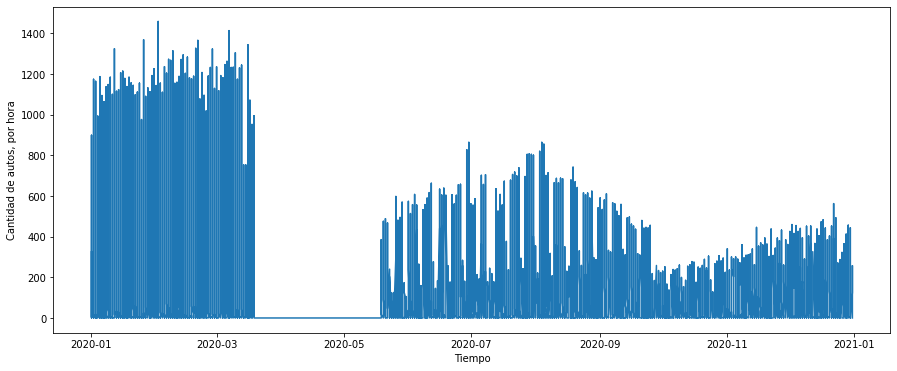

In [7]:
#Graficamos nuestros datos
plt.figure(figsize = (15,6))
plt.plot(data_2020.fecha, data_2020.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

* Se puede evidenciar en el grafico anterior que entre el mes de marzo de 2020 y junio de 2020 la cantidad de autos por hora disminuyo drasticamente, ya como es sabido por los efectos de la cuarentena del virus del Covid 19.
* Despues de la cuarentena podemos observar que la serie va decreciendo, puede ser por: 
* La disminucion de pago en efectivo por riesgos de contagio de covid.
* La utilizacion de otros tipos de pago como el telepeaje, ya que es mas rapido para el pago y evita congestiones vehiculares.

In [8]:
#Se aplica filtro a los datos cantidad de pasos igual a 1.
data_2020[data_2020['cantidad_pasos']==1]

,fecha,tipo_vehiculo,sentido,cantidad_pasos
2,2020-01-01,Pesados 2 Ejes,Centro,1.0
11,2020-01-01,Pesados 2 Ejes,Centro,1.0
12,2020-01-01,Pesados 2 Ejes,Provincia,1.0
14,2020-01-01,Pesados 2 Ejes,Provincia,1.0
16,2020-01-01,Pesados 2 Ejes,Provincia,1.0
...,...,...,...,...
52335,2020-12-31,Pesados 2 Ejes,Provincia,1.0
52339,2020-12-31,Pesados 2 Ejes,Provincia,1.0
52340,2020-12-31,Pesados 2 Ejes,Centro,1.0
52342,2020-12-31,Moto,Provincia,1.0


In [9]:
# Realizamos la imputacion de datos faltantes a las columnas almacenadas en la variable faltantes con la 
# media.
imputer = SimpleImputer(missing_values=1, strategy='mean')

In [10]:
#Se calcula el promedio de las columnas a partir de algunos datos y 
#luego reemplazar los valores faltantes.
data_2020.cantidad_pasos =imputer.fit_transform(data_2020['cantidad_pasos'].values.reshape(-1,1))[:,0]

In [11]:
#Se imprime de nuevo el dataset.
data_2020


,fecha,tipo_vehiculo,sentido,cantidad_pasos
0,2020-01-01,Auto,Centro,326.000000
1,2020-01-01,Pago Doble Auto,Provincia,2.000000
2,2020-01-01,Pesados 2 Ejes,Centro,118.170758
3,2020-01-01,Pesados 2 Ejes,Provincia,2.000000
4,2020-01-01,Pesados 2 Ejes,Centro,2.000000
...,...,...,...,...
52369,2020-12-31,Moto,Provincia,16.000000
52370,2020-12-31,Moto,Centro,13.000000
52371,2020-12-31,Moto,Provincia,8.000000
52372,2020-12-31,Moto,Provincia,18.000000


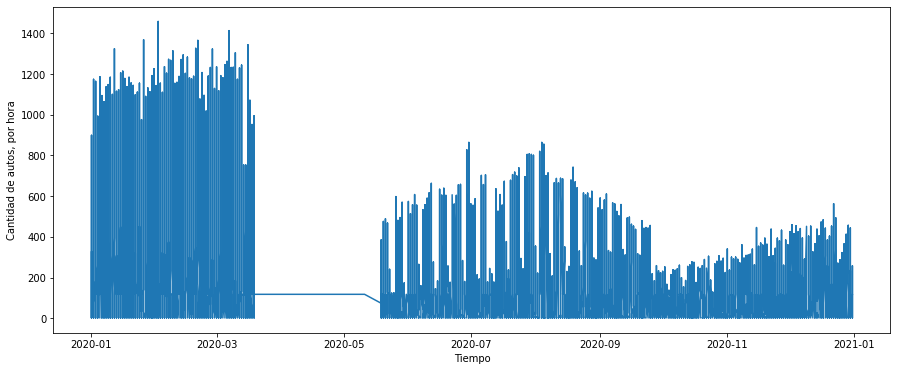

In [12]:
#Reordenamos el dataset por fecha
data_2020.sort_values('fecha', inplace = True)
data_2020.reset_index(drop=True, inplace = True)

#Graficamos de nuevo los datos
plt.figure(figsize = (15,6))
plt.plot(data_2020.fecha, data_2020.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

* En este grafico se observa que despues de reordenar el dataset sigue habiendo una caida abrupta de los pasos de los vehiculos por esta estacion y pago en efectivo.

In [13]:
#Se guardan las dos variables categoricas tipo_vehiculo,sentido en una nueva.
categorical_features = ['tipo_vehiculo','sentido']

In [14]:
#Se combierte la nueva variable categorical_feature en numerica con OneHotEncoder.
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False).fit(data_2020[categorical_features])

In [15]:
#Se extrae los nombres de las características de cada uno de los transformadores.
ohe.get_feature_names()

C:\Users\Administrador\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_Auto', 'x0_Auto con trailer', 'x0_Moto', 'x0_N/D',
       'x0_Pago Doble Auto',
       'x0_Pago Doble Auto con trailer / Pesado 2 Ejes',
       'x0_Pago doble Moto', 'x0_Pesados 2 Ejes', 'x0_Pesados 3 Ejes',
       'x0_Pesados 4 Ejes', 'x0_Pesados 5 Ejes', 'x0_Pesados 6 Ejes',
       'x1_Centro', 'x1_Provincia'], dtype=object)

In [16]:
##Se hace la codificacion de las variables categoricas y se le aplica el transformador get_feature_names. 
#Se genera un nuevo dataframe solo con las variables categoricas transformadas a numericas.
ohe_df = pd.DataFrame(ohe.transform(data_2020[categorical_features]), columns=ohe.get_feature_names())
ohe_df

C:\Users\Administrador\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_Auto,x0_Auto con trailer,x0_Moto,x0_N/D,x0_Pago Doble Auto,x0_Pago Doble Auto con trailer / Pesado 2 Ejes,x0_Pago doble Moto,x0_Pesados 2 Ejes,x0_Pesados 3 Ejes,x0_Pesados 4 Ejes,x0_Pesados 5 Ejes,x0_Pesados 6 Ejes,x1_Centro,x1_Provincia
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52369,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52370,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
52371,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52372,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Se aplica el drop para quitar campos.
data_2020.drop(labels=categorical_features, axis=1, inplace=True)

#Se concatenan dos campos y se crea un nuevo dataframe para entrenar el modelo.
test_data = pd.concat(objs=[data_2020.reset_index(drop=True),
                            ohe_df], axis=1)

In [18]:
#Imprimimos el nuevo dataframe.
test_data

,fecha,cantidad_pasos,x0_Auto,x0_Auto con trailer,x0_Moto,x0_N/D,x0_Pago Doble Auto,x0_Pago Doble Auto con trailer / Pesado 2 Ejes,x0_Pago doble Moto,x0_Pesados 2 Ejes,x0_Pesados 3 Ejes,x0_Pesados 4 Ejes,x0_Pesados 5 Ejes,x0_Pesados 6 Ejes,x1_Centro,x1_Provincia
0,2020-01-01,326.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2020-01-01,11.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2020-01-01,319.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2020-01-01,199.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2020-01-01,180.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52369,2020-12-31,235.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52370,2020-12-31,218.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
52371,2020-12-31,232.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52372,2020-12-31,227.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


* Separo de dataframe los atributos y las etiquetas. Llamar X a los features e y a las etiquetas.

In [19]:
#Se aplica pop para quitar los campos cantidad de pasos y fecha.
Y = test_data.pop('cantidad_pasos')
quitar = test_data.pop('fecha')

In [20]:
X = test_data

In [21]:
#Imprimo los tipos de datos de X.
X.dtypes

x0_Auto                                           float64
x0_Auto con trailer                               float64
x0_Moto                                           float64
x0_N/D                                            float64
x0_Pago Doble Auto                                float64
x0_Pago Doble Auto con trailer / Pesado 2 Ejes    float64
x0_Pago doble Moto                                float64
x0_Pesados 2 Ejes                                 float64
x0_Pesados 3 Ejes                                 float64
x0_Pesados 4 Ejes                                 float64
x0_Pesados 5 Ejes                                 float64
x0_Pesados 6 Ejes                                 float64
x1_Centro                                         float64
x1_Provincia                                      float64
dtype: object

* Aqui alimentamos con valores aleatorios las variables a predecir.
se realiza un Train/Test split de los datos.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                   Y, train_size   = 0.3,
                                   random_state = 42, shuffle      = True)

print(f'El set de entrenamiento tiene {X_train.shape[0]} observaciones, y {X_train.shape[1]} variables.')
print(f'El set de prueba tiene {X_test.shape[0]} observaciones, y {X_test.shape[1]} variables.')

El set de entrenamiento tiene 15712 observaciones, y 14 variables.
El set de prueba tiene 36662 observaciones, y 14 variables.


## Modelo XGBRegressor.

 XGBoost es la abreviatura de Extreme Gradient Boosting y es una implementación eficiente del algoritmo de aprendizaje de la máquina de impulso de gradiente estocástico. El algoritmo de aumento de gradiente estocástico, también llamado máquinas de aumento de gradiente o aumento de árbol, es una poderosa técnica de aprendizaje de máquinas que funciona bien o incluso mejor en una amplia gama de problemas de aprendizaje de máquinas desafiantes.

Es un conjunto de árboles de decisión algorítmicos donde los nuevos árboles arreglan los errores de los árboles que ya forman parte del modelo. Los árboles se añaden hasta que no se pueden hacer más mejoras en el modelo.

Ventajas: 

* Los árboles son fáciles de interpretar aun cuando las relaciones entre predictores son complejas.
* Son muy útiles en la exploración de datos, permiten identificar de forma rápida y eficiente las variables (predictores) más importantes.
* Son capaces de seleccionar predictores de forma automática.
* Pueden aplicarse a problemas de regresión y clasificación.
* Los árboles pueden, en teoría, manejar tanto predictores numéricos como categóricos sin tener que crear variables dummy o one-hot-encoding. En la    práctica, esto depende de la implementación del algoritmo que tenga cada librería.

* Al tratarse de métodos no paramétricos, no es necesario que se cumpla ningún tipo de distribución específica.

* Por lo general, requieren mucha menos limpieza y preprocesado de los datos en comparación con otros métodos de aprendizaje estadístico (por ejemplo, no requieren estandarización).

* No se ven muy influenciados por outliers.


Se escogio este modelo ya que podemos usar el XGBRegressor para hacer un pronóstico de un paso, XGBoost es una implementación eficiente de la potenciación de gradientes para los problemas de clasificación y regresión, en este caso regresion, Es rápido y eficiente, y funciona bien, en una amplia gama de tareas de modelado predictivo.


Adicionalmente es un modelo que no se aplico en ningunas de las clases.
* se extrae la informacion de https://rpubs.com/Joaquin_AR/255596
* https://topbigdata.es/una-suave-introduccion-a-las-funciones-de-perdida-de-xgboost/

In [23]:
#Se aplica el modelo elegido.
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)


xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [24]:
#Después de entrenar, verificaremos la puntuación de entrenamiento del modelo.
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)


Training score:  0.33145632982668083


* La puntuacion de entrenamiento nos indica un 0.33%

In [25]:
#En este punto nos arroja la prediccion el modelo.
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
MSE: 3.35
print("RMSE: %.2f" % (mse**(1/2.0)))
RMSE: 1.83 


MSE: 25825.91
RMSE: 160.70


* Tiene un error de MSE 26063 en cantidad de pasos y un RMSE de 161 y una diferencia entre 25902 y 26224.

## Prediccion

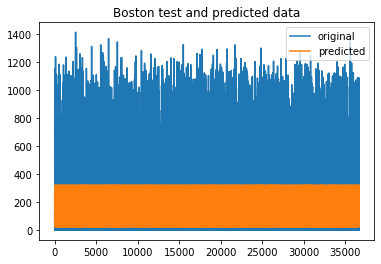

In [26]:
#Original vs la prediccion.
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

* Segun los datos arrojados por el modelo XGBRegressor podemos observar que los datos originales nos indican hasta 1400 pasos por hora frente a la prediccion que es mucho mas baja hasta 280 pasos por hora en el peaje ilia, entre la prediccion y los datos originales hay mucha diferencia de error, no predice muy bien.

## Analisis de las series de tiempo:

* Se toma la estacion Illia.
* En el 2020 se nota una tendencia a la baja en pago de efectivo, en la estacion escogida, en una gran parte por la pandemia, que ne la serie coincide con las fechas de cuarentena y una caida ya sea por la facilidad de pago con el TelePASE y por evitar utilizar efectivo con pandemia.


# Cierre de Proyecto

* Utilizar XGBRegressor fue muy interesante ya que es uno de los mas usados, Este algoritmo se caracteriza por obtener buenos resultados de predicción utilizando arboles “débiles” para la prediccion secuencialmente tomando datos del modelo anterior para generar un modelo mas fuerte con mejores predicciones y mayor efectividad en sus resultados.
Es eficiente desde el punto de vista informático (rápido de ejecutar) muy eficaz, Es rápida, eficiente en la memoria y de alta precisión, por todas estas cualidades se escogio este modelo.